In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

In [15]:
img_width,img_height=42,42

In [16]:
training_generator=ImageDataGenerator(
    rescale=1.255,
    rotation_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True
)

In [17]:
training_set=training_generator.flow_from_directory(
    "/content/drive/MyDrive/RockPaperScissor/rps/",
    color_mode='rgb',
    target_size=(img_width,img_height),
    batch_size=32,
    class_mode='categorical'
)

Found 2540 images belonging to 3 classes.


In [18]:
validation_generator=ImageDataGenerator(
    rescale=1.255
)

In [19]:
validation_set=validation_generator.flow_from_directory(
    "/content/drive/MyDrive/RockPaperScissor/rps-test-set/",
    color_mode='rgb',
    target_size=(img_width,img_height),
    batch_size=32,
    class_mode='categorical'
)

Found 372 images belonging to 3 classes.


In [20]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(42,42,3)))
model.add(MaxPooling2D(3,3))
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(42,42,3)))
model.add(MaxPooling2D(3,3))
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(3,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [22]:
history=model.fit(training_set,validation_data=(validation_set),epochs=20)

Epoch 1/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 208s 3s/step - accuracy: 0.3724 - loss: 38.6028 - val_accuracy: 0.5081 - val_loss: 0.9552
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 18s 208ms/step - accuracy: 0.4645 - loss: 1.0673 - val_accuracy: 0.6505 - val_loss: 0.7919
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 215ms/step - accuracy: 0.5873 - loss: 0.8711 - val_accuracy: 0.5699 - val_loss: 0.8662
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 20s 208ms/step - accuracy: 0.5874 - loss: 0.8547 - val_accuracy: 0.8468 - val_loss: 0.5319
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 18s 214ms/step - accuracy: 0.6817 - loss: 0.7465 - val_accuracy: 0.9113 - val_loss: 0.4219
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 20s 208ms/step - accuracy: 0.7152 - loss: 0.6414 - val_accuracy: 0.8656 - val_loss: 0.3355
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 19s 217ms/step - accuracy: 0.7302 - loss: 0.6185 - val_accuracy: 0.9651 - val_loss: 0.2524
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 19s 219ms/step - accuracy: 0.7627 - loss: 0.5487 - val_accur

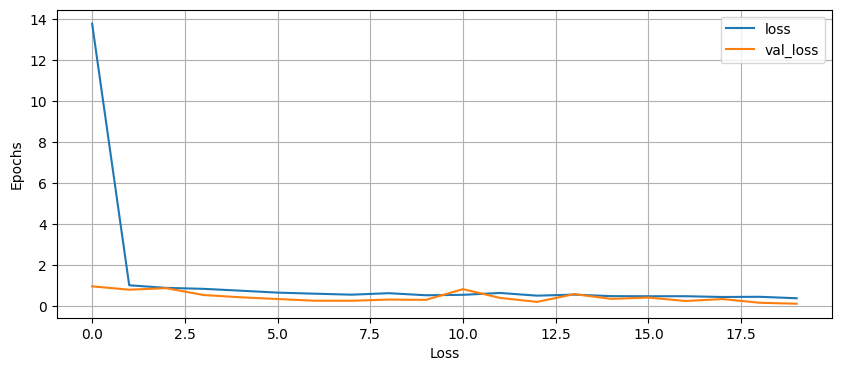

In [23]:
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend()
plt.grid()
plt.show()

In [24]:
model.save('cnn.h5')